"Pre-lecture" HW

1.

Explanation:

(1) Mean and Median: These are represented by vertical lines.

Mean is marked as a dashed blue line.

Median is marked as a dotted green line.

(2) Ranges: Vertical rectangles (fig.add_vrect()) are added to represent:

Min-Max Range: From the minimum to the maximum flipper length, marked with a yellow shaded area.

Interquartile Range (IQR): From the 25th percentile to the 75th percentile, shaded in orange.

Two Standard Deviations from the Mean: From two standard deviations below to two standard deviations above the mean, shaded in light blue.

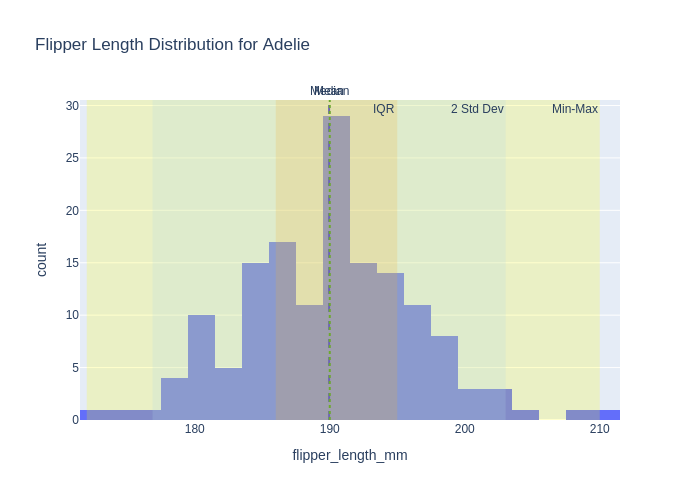

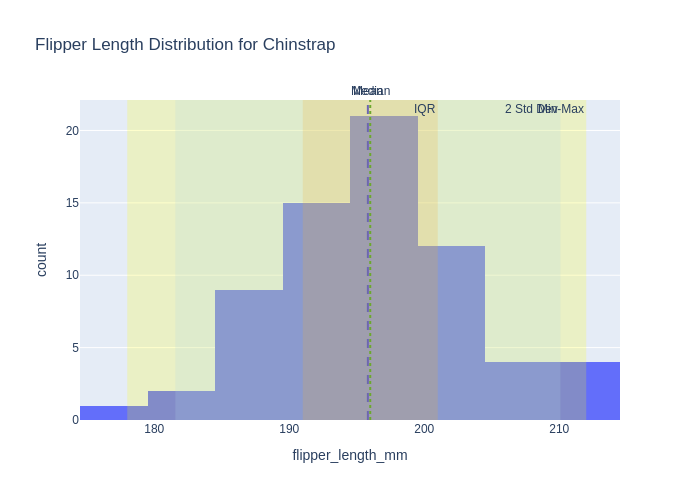

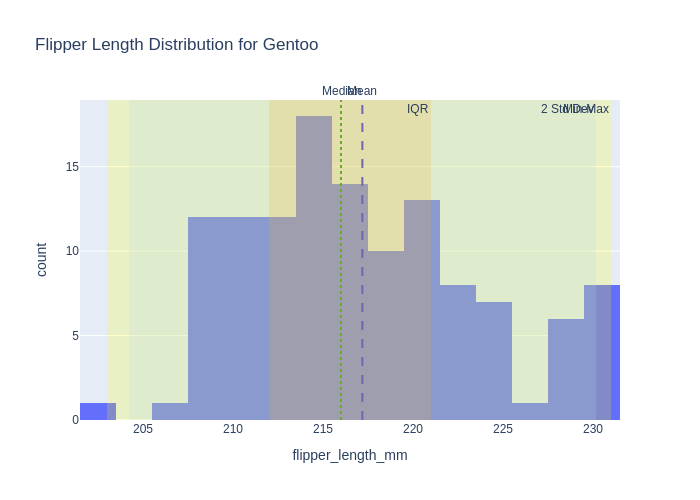

In [2]:
import plotly.express as px
import seaborn as sns
import pandas as pd

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Remove rows with missing flipper length
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to create the histogram for each species
def create_histogram_for_species(species):
    # Filter the species
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    min_val = data.min()
    max_val = data.max()
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    
    # Create the histogram
    fig = px.histogram(penguins[penguins['species'] == species], x='flipper_length_mm',
                       title=f'Flipper Length Distribution for {species}')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', width=2, dash='dash'), annotation_text='Mean', annotation_position='top')
    fig.add_vline(x=median, line=dict(color='green', width=2, dash='dot'), annotation_text='Median', annotation_position='top')
    
    # Add vertical rectangles for ranges
    # Min-Max Range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="yellow", opacity=0.2, line_width=0, annotation_text='Min-Max')
    
    # Interquartile Range (IQR)
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="orange", opacity=0.2, line_width=0, annotation_text='IQR')
    
    # 2 Standard Deviations from the Mean
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, fillcolor="lightblue", opacity=0.2, line_width=0, annotation_text='2 Std Dev')
    
    # Use PNG rendering for GitHub and MarkUs submissions
    fig.show(renderer="png")

# Create histograms for each species
species_list = penguins['species'].unique()

for species in species_list:
    create_histogram_for_species(species)


Ghat history: https://chatgpt.com/share/66f1c9da-bf3c-8013-ae78-92cd6cf9e3da

2.

Explanation:

(1) Mean and Median: Vertical lines are drawn for the mean and median using ax.axvline().

The mean is represented by a dashed blue line.

The median is represented by a dash-dotted green line.

(2) Ranges: We use ax.axvspan() to create shaded regions:

Min-Max Range: From the minimum to the maximum flipper length, shaded in yellow.

Interquartile Range (IQR): From the 25th to the 75th percentile, shaded in orange.

Two Standard Deviations from the Mean: From two standard deviations below to two standard deviations above the mean, shaded in light blue.

(3) Subplots: The three KDE plots for each species are displayed in a row of three, sharing the y-axis for better comparison.

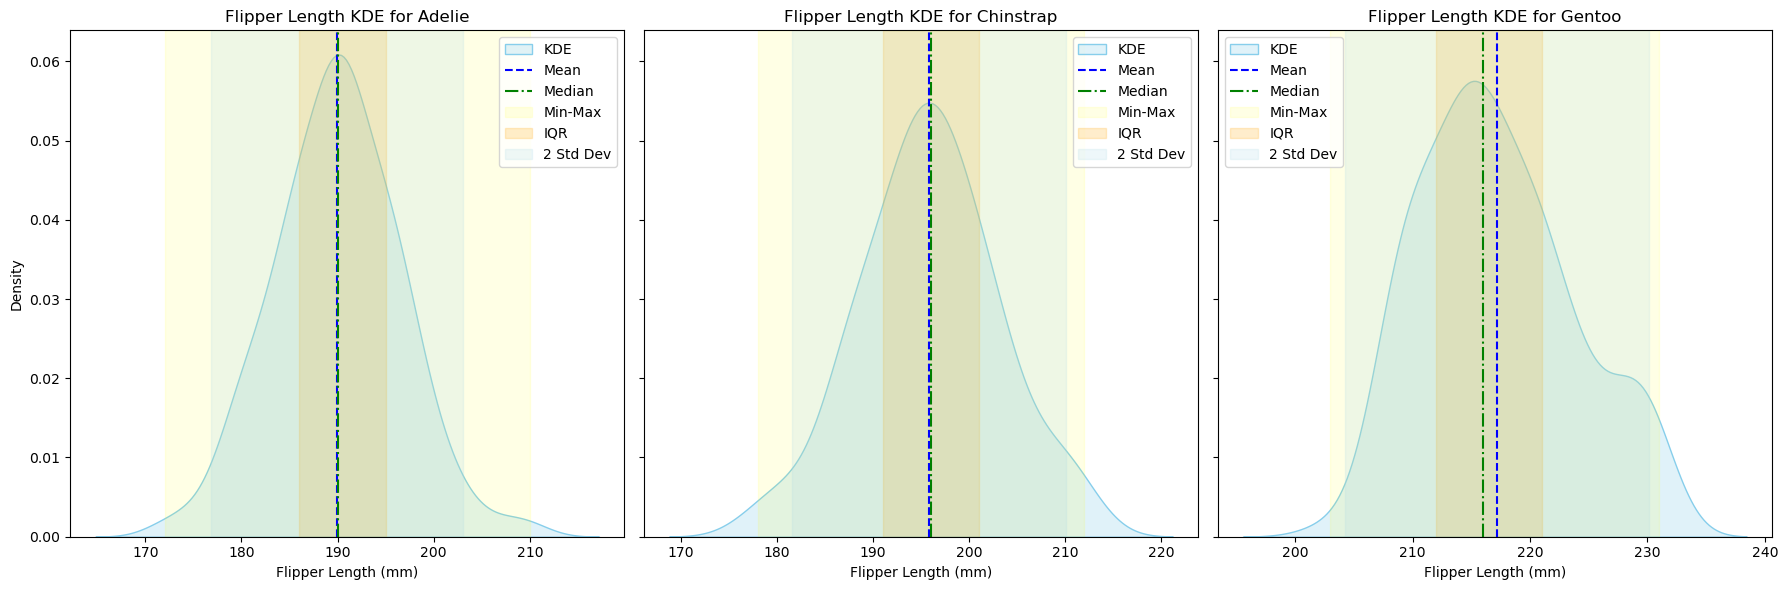

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Remove rows with missing flipper length
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to create KDE plots for each species
def plot_kde_for_species(ax, species):
    # Filter the species
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    min_val = data.min()
    max_val = data.max()
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)
    
    # KDE plot
    sns.kdeplot(data, ax=ax, fill=True, color='skyblue', label='KDE')
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='-.', label='Median')
    
    # Shade regions for ranges
    # Min-Max Range
    ax.axvspan(min_val, max_val, alpha=0.1, color='yellow', label='Min-Max')
    
    # Interquartile Range (IQR)
    ax.axvspan(lower_iqr, upper_iqr, alpha=0.2, color='orange', label='IQR')
    
    # 2 Standard Deviations from the Mean
    ax.axvspan(mean - 2*std_dev, mean + 2*std_dev, alpha=0.2, color='lightblue', label='2 Std Dev')
    
    # Add labels and title
    ax.set_title(f'Flipper Length KDE for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Get unique species
species_list = penguins['species'].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop over species and create a plot for each
for i, species in enumerate(species_list):
    plot_kde_for_species(axes[i], species)

# Adjust layout
plt.tight_layout()
plt.show()


Ghat history: https://chatgpt.com/share/66f1c9da-bf3c-8013-ae78-92cd6cf9e3da

#
3.

In this three data distribution virtualization methods. I prefer the box plots.Here are the reasons.

1.Box plots provide a quick and clear overview of key statistical values, such as the median, quartiles, and potential outliers. This allows me to get a sense of the central tendency and spread of the data at a glance easly.

2.Box plots are particularly useful when comparing multiple datasets. I can easily place them side by side and immediately see differences in central tendency (median) and variability (quartile spread), which makes them more suitable for comparative analysis than histograms or KDEs.

3.Box plots make it simple to detect outliers in the data, as they are visually marked outside the "whiskers." This helps me to quickly identify unusual values or potential data quality issues, something that histograms and KDEs don't display as clearly.

So although these three methods have their own advantages and disadvantages, I think Box plots have the most advantages and are the most important for statistics.

Summary of chat:

In this conversation, you first shared your initial thoughts on comparing histograms, box plots, and kernel density estimators (KDEs) for data distribution visualization. You noted that while histograms make it easy to understand the frequency of data, they are less effective when comparing different datasets. Box plots, on the other hand, are useful for quickly presenting statistical information like medians and quartiles, and they allow for easy comparisons across datasets, but they struggle to represent multimodal distributions and do not show the number of individual data points. You then requested a detailed comparison of the pros and cons of these three methods, and after receiving the breakdown, you expressed a preference for box plots, citing their efficiency in summarizing key statistics, ease of comparing datasets, and clear outlier detection, while acknowledging their limitations.

Ghat history: https://chatgpt.com/share/66f332cd-23f8-8013-a5ed-7f1de885a9a7

#
4.

This is the code I used to calculate the mean and variance of each group of data.

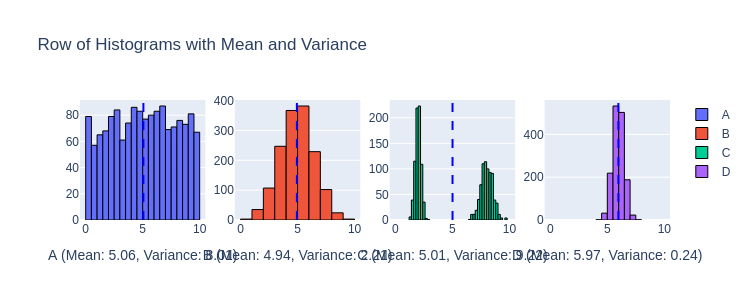

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Number of samples
n = 1500

# Generate data
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Create a subplot with 4 histograms
fig = make_subplots(rows=1, cols=4)

# Add histograms
fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Calculate mean and variance for each dataset
mean1, var1 = np.mean(data1), np.var(data1)
mean2, var2 = np.mean(data2), np.var(data2)
mean3, var3 = np.mean(data3), np.var(data3)
mean4, var4 = np.mean(data4), np.var(data4)

# Add vertical lines to mark the mean
fig.add_vline(x=mean1, line=dict(color='blue', width=2, dash='dash'), row=1, col=1)
fig.add_vline(x=mean2, line=dict(color='blue', width=2, dash='dash'), row=1, col=2)
fig.add_vline(x=mean3, line=dict(color='blue', width=2, dash='dash'), row=1, col=3)
fig.add_vline(x=mean4, line=dict(color='blue', width=2, dash='dash'), row=1, col=4)

# Update layout to show mean and variance in titles
fig.update_layout(
    height=300, 
    width=750, 
    title_text="Row of Histograms with Mean and Variance"
)

# Update x-axes labels and titles to include mean and variance
fig.update_xaxes(title_text=f"A (Mean: {mean1:.2f}, Variance: {var1:.2f})", row=1, col=1)
fig.update_xaxes(title_text=f"B (Mean: {mean2:.2f}, Variance: {var2:.2f})", row=1, col=2)
fig.update_xaxes(title_text=f"C (Mean: {mean3:.2f}, Variance: {var3:.2f})", row=1, col=3)
fig.update_xaxes(title_text=f"D (Mean: {mean4:.2f}, Variance: {var4:.2f})", row=1, col=4)

# Set the x-axis range
fig.update_xaxes(range=[-0.5, 10.5])

# Update binning to have consistent bins across histograms
for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# Show the plot with PNG rendering for GitHub or MarkUs submissions
fig.show(renderer="png")


4.1

Dataset A and Dataset C have similar means and similar variances

4.2

Dataset A and Dataset B or Dataset C and Dataset B have similar means but quite different variances

4.3

Dataset B and Dataset D have similar variances but quite different means

4.4

Dataset A and Dataset D or Dataset C and Dataset D have quite different means and quite different variances

Ghat history: https://chatgpt.com/share/66f35037-8110-8013-b802-cf25403dd140

#
"Post-lecture" HW

5.

In a right-skewed distribution, the tail is longer on the right, and extreme large values pull the mean higher, so the mean is greater than the median. In a left-skewed distribution, the tail is longer on the left, and extreme small values pull the mean lower, so the mean is less than the median. This relationship occurs because the mean is more sensitive to extreme values, while the median is more robust and reflects the central part of the data.

Code to demonstrate the relationship between the mean and median and "right" and "left" skewness：

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# Generate left-skewed (negative skewed) data by negating the Gamma distribution
sample_left_skewed = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Assuming you have already calculated right-skewed distribution elsewhere
# If not, you can generate a right-skewed distribution like this:
sample_right_skewed = stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for both distributions
mean_left_skewed = sample_left_skewed.mean()
median_left_skewed = np.median(sample_left_skewed)

mean_right_skewed = sample_right_skewed.mean()
median_right_skewed = np.median(sample_right_skewed)

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'Distribution': ['Right-Skewed', 'Left-Skewed'],
    'Mean': [mean_right_skewed, mean_left_skewed],
    'Median': [median_right_skewed, median_left_skewed]
})

# Option 1: Print the results
print(results_df)

# Option 2: Save to CSV
results_df.to_csv("skewness_central_tendency_summary.csv", index=False)


   Distribution      Mean    Median
0  Right-Skewed  3.964721  3.289736
1   Left-Skewed -3.856367 -3.417451


Ghat history: https://chatgpt.com/share/66f35037-8110-8013-b802-cf25403dd140

#
6.

I choose the Iris dataset, a well-known dataset in machine learning, which contains information about three species of iris flowers with the following features：
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width
5. Species (Setosa, Versicolor, Virginica)

Summary Statistics

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])

# Calculate summary statistics
summary_stats = iris_df.describe()

# Print summary statistics
print(summary_stats)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


I create visualizations to show these relationships more clearly. I generate the boxplots to show the distribution of each feature per species.

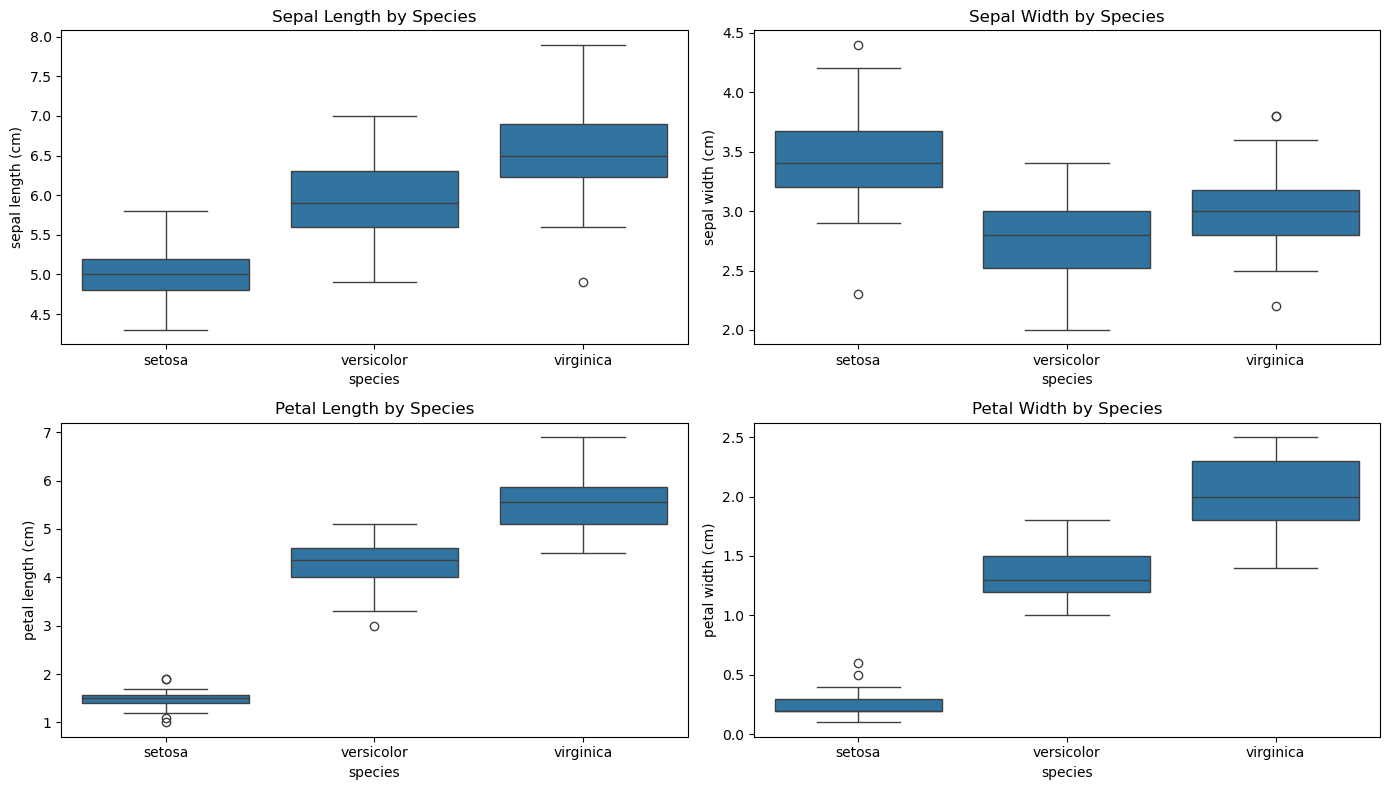

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])

# Boxplot to visualize feature distributions by species
plt.figure(figsize=(14, 8))

# Subplot 1: Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title("Sepal Length by Species")

# Subplot 2: Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df)
plt.title("Sepal Width by Species")

# Subplot 3: Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title("Petal Length by Species")

# Subplot 4: Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
plt.title("Petal Width by Species")

plt.tight_layout()
plt.show()


The summary statistics and visualizations of the Iris dataset provide some interesting initial insights:

1. Sepal and Petal Differences:

The mean sepal length is around 5.84 cm, while the mean petal length is 3.76 cm.

There is a significant variation in petal length (std: 1.77 cm), much larger than the variation in sepal length (std: 0.83 cm).

2. Sepal Width:

Sepal width has a mean of 3.06 cm with relatively low variation compared to the other features.

3. Minimum and Maximum Values:

The petal length varies from 1 cm to 6.9 cm, showing the wide range across different iris species.

Ghat history: https://chatgpt.com/share/66f35638-3f94-8013-9be6-2bd96fd670a1

#
7.

In [10]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

8.

Key Changes:
1. x-axis (percent change): Shows the change in the name's percentage from the previous year.
2. y-axis (rank): Displays the rank of each name based on prevalence.

3. size (percent): The bubble size is determined by the percentage prevalence of each name.
4. color (sex): Names are colored based on gender (male/female).

5. Removed log_x=True and range_y: These parameters were removed as per your instructions.

6. Animation (year): The plot animates over time to show changes in name prevalence each year.

7. Reversed y-axis: Rank 1 is placed at the top for better interpretation.

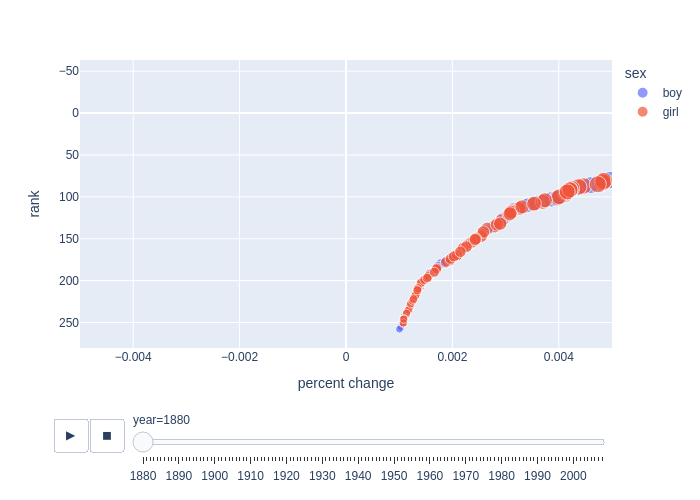

In [9]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by appending 'sex'
bn['name'] = bn['name'] + " " + bn['sex']

# Rank names by prevalence (percent) within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort by name and year for calculating percentage change
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change in name prevalence from the previous year
bn['percent change'] = bn['percent'].diff()

# Identify new names appearing in the dataset
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Filter to common names (percent > 0.001)
bn = bn[bn.percent > 0.001]

# Sort the data by year
bn = bn.sort_values('year')

# Create the scatter plot
fig = px.scatter(
    bn,
    x="percent change",          # x-axis as percent change
    y="rank",                    # y-axis as rank
    animation_frame="year",      # animation over time (year)
    animation_group="name",      # group by name
    size="percent",              # bubble size by percent
    color="sex",                 # color by sex (gender)
    hover_name="name",           # show the name on hover
    size_max=50,                 # maximum bubble size
    range_x=[-0.005, 0.005]      # restrict the x-axis range
)

# Reverse the y-axis so that rank 1 is at the top
fig.update_yaxes(autorange='reversed')

# Show the figure (rendered as PNG for submission)
fig.show(renderer="png")


Ghat history: https://chatgpt.com/share/66f35638-3f94-8013-9be6-2bd96fd670a1

#
9.

YES, I reviewed the course wiki-textbook and interacted with a ChatBot to help me understand all the material in the tutorial and lecture that I didn't quite follow when I first saw it.